In [62]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [63]:
# import
import pickle as pk
import matplotlib.pyplot as plt

In [64]:
# import soda vars

# these are only one time step
with open('SODA_inputs.p', 'rb') as f:
    salt_south1, salt_east1, ist_south, ist_east = pk.load(f)
    
#print(salt_east.shape)

# import spatial vars

with open('BC_depth.p', 'rb') as f:
    depth_south, depth_east = pk.load(f)

with open('BC_coords.p', 'rb') as f:
    lon_south, lon_east, lat_south, lat_east = pk.load(f)

# contour plot to check if imported correctly

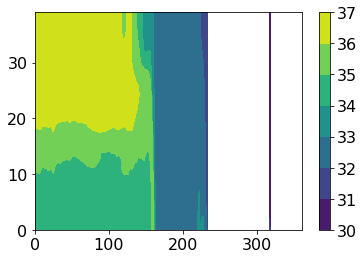

In [69]:
plt.figure()
#plt.contourf(lat_east)
#plt.contourf(lon_east)
#plt.contourf(depth_east)
#plt.contourf(depth_south)

#plt.contourf(ist_south)
#plt.contourf(ist_east)
#plt.contourf(salt_south1)
plt.contourf(salt_east1)

plt.colorbar()

Text(0.5, 1.0, 'in situ temperature south')

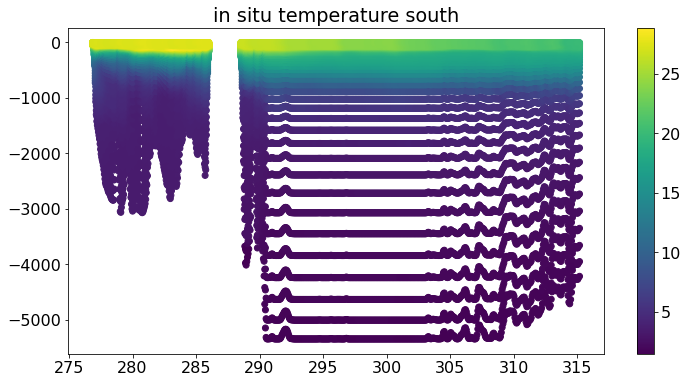

In [72]:
# sactter plot to check depth 

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

plt.scatter(lon_south, depth_south, marker='o', c=ist_south)
plt.colorbar()

plt.title("in situ temperature south")

# fixed!!

# normalize variables

In [73]:
# normalize variables

Tmean = 13.1856
Tstd = 5.1979

Tn_south = (ist_south-Tmean)/Tstd
Tn_east = (ist_east-Tmean)/Tstd

Smean = 34.4037
Sstd = 1.4914

Sn_south = (salt_south1-Smean)/Sstd
Sn_east = (salt_east1-Smean)/Sstd

# plot to check normalized

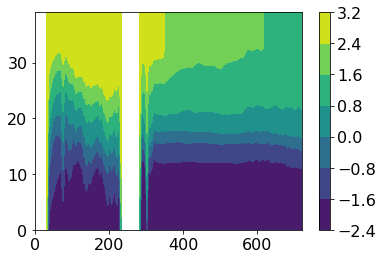

In [74]:
plt.figure()

plt.contourf(Tn_south)
#plt.contourf(Tn_east)
#plt.contourf(Sn_south)
#plt.contourf(Sn_east)

plt.colorbar()

# calculate DIC and TA

In [75]:
# equation coefficients

# DIC coefficients
a0=2103.3
a1=-56.408
a2=58.347
a3=-7.2612

# TA coeffficients
b0=2289.4;
b1=0.75761;
b2=69.15;

# MLR equations

DIC_south = a0 + a1*Tn_south + a2*Sn_south + a3*Tn_south*Sn_south
DIC_east = a0 + a1*Tn_east + a2*Sn_east + a3*Tn_east*Sn_east

TA_south = b0 + b1*Tn_south + b2*Sn_south
TA_east = b0 + b1*Tn_east + b2*Sn_east

# plot to check MLR TA and DIC

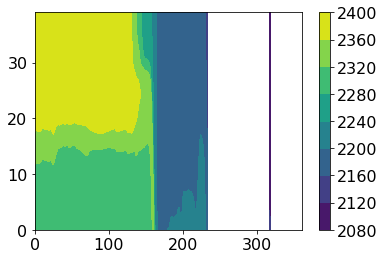

In [76]:
plt.figure()

#plt.contourf(TA_south)
plt.contourf(TA_east)
#plt.contourf(DIC_south)
#plt.contourf(DIC_east)

plt.colorbar()

# plot with depth y-axis

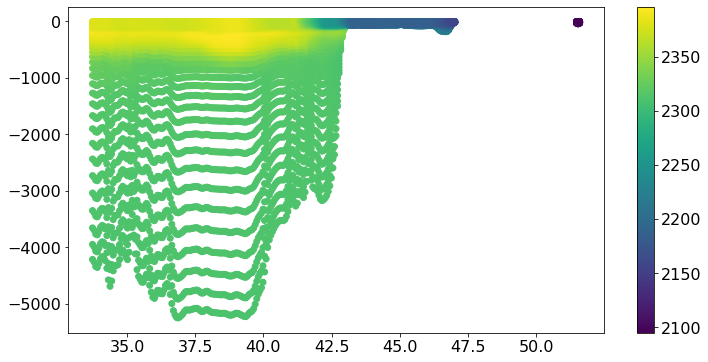

In [77]:
plt.figure(figsize=(12, 6))
#plt.scatter(lon_south, depth_south, marker='o', c=TA_south)
plt.scatter(lat_east, depth_east, marker='o', c=TA_east)
plt.colorbar()

In [78]:
lon_south.shape

(40, 722)

In [79]:
depth_south.shape

(40, 722)